<a href="https://colab.research.google.com/github/guilhermeaugusto9/sigmoidal/blob/master/04_10_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Regressão Logística

No exemplo da Regressão Linear, queríamos inferir qual o preço de venda colocar em uma casa, dado um conjunto de *features*. Ou seja, queríamos fazer a previsão de um valor contínuo.

Já a Regressão Logística serve para classificar algo dentro de um conjunto de categorias. Como exemplo, podemos pegar o *dataset* de pacientes com doenças cardiovasculares usado no módulo anterior.

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-04.12.06.png" width="40%"></p>

Na última linha, como faríamos para classificar o paciente como possuindo ou não uma doença cardíaca? A Regressão Linear não é adequada aqui, uma vez que trabalha com valores contínuos.

A Regressão Logística é ideal nesse tipo de situação, de classificação, pois trabalha com probabilidades. No caso, após treinar o modelo conseguiríamos ver qual a probabilidade de um dado paciente possuir ou não algum problema no coração.

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-04.53.01.png" width="50%"></p>

Pense na imagem acima como se o eixo-x fosse a idade de um paciente e o eixo y a probabilidade dele ter uma doença cardíaca. 

Como você vê, precisamos mapear valores para dentro de um range $[0,1]$. Para isso, usamos a função sigmóide,

$$
sigmoid(z) = \frac{1}{1 + e^{-z}}
$$

onde $z= b + w_1x_1 + w_2x_2 + \dots + w_mx_m$ é o *output* da camada linear de um modelo de regressão logística. A curva **sigmoidal** irá mapear esse valor (qualquer) para o itnervalo entre 0 e 1.

Assim como na Regressão Linear nós tínhamos o erro quadrático (*squared loss*), a *loss function* para a Regressão Logística é representada po

$$
\text{Log Loss} = \sum_{(x, y) \in D} -y\log(\hat{y}) - (1 -y)\log(1-\hat{y})
$$

## Regressão Logística no `scikit-learn`

O conjunto de dados original, que foi adapatado neste *notebook*, foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

Diferentemente do arquivo `csv` que foi disponibilizado no Módulo 3, [neste link](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0) você encontra o arquivo com os dados já tratado. Para nossa variável alvo (*target*) você encontra as seguintes categorias:

* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1: há doença cardíaca ( > 50% de estreitamento do diâmetro)



In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Repare em tudo que estamos importando na célula abaixo. Além de `LogisticRegression` estamos importando métricas totalmente diferentes daquelas que usamos para avaliar modelos de Regressão Linear, o que faz todo sentido.


In [ ]:
# importar scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Nesta etapa, vamos dividir o *dataset* entre treino e teste, da mesma maneira que fizemos e sempre vamos fazer para outros modelos.

In [ ]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector 
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2 Padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test)  # padronizar os dados de teste
y_pred = model.predict(X_test)

Antes de olhar as métricas de avaliação do modelo, vamos relembrar os conceitos:

* **Verdadeiro positivo (*true positive* — TP):** Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como tendo doença vascular.

* **Falso positivo (*false positive* — FP):** Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como tendo doença vascular.

* **Falso verdadeiro (*true negative* — TN)**: Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como não tendo doença vascular.

* **Verdadeiro negativo (*false negative* — FN):** Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como não tendo doença vascular.

In [ ]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        36
           1       0.79      0.75      0.77        40

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



Por fim, vamos plotar a matriz de confusão para ter, pictorialmente, uma visão do desempenho por classes.

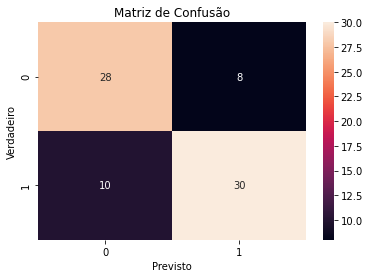

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Caso você queira ver as probabilidades associadas a cada previsão, pode utilizar o método `predict_proba` da seguinte maneira.

In [ ]:
# probabilidades em cima do dataset de teste
y_prob = model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_proba: \n", y_prob[0:5])

y_pred: 
 [0 0 1 1 0]

y_proba: 
 [[0.79661804 0.20338196]
 [0.75440412 0.24559588]
 [0.30192329 0.69807671]
 [0.06193397 0.93806603]
 [0.78902829 0.21097171]]
